In [36]:
import itertools
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
import matplotlib

In [37]:
plt.style.use('fivethirtyeight')
matplotlib.rcParams['axes.labelsize'] = 30
matplotlib.rcParams['xtick.labelsize'] = 12
matplotlib.rcParams['ytick.labelsize'] = 12
matplotlib.rcParams['text.color'] = 'k'

In [38]:
furniture = pd.read_csv("SBI_Historical_Data.csv")
furniture.head()

,Date,Price,Open,High,Low,Vol.,Change %
0,"Aug 07, 2020",190.65,191.45,192.10,189.55,44.82M,-0.16%
1,"Aug 06, 2020",190.95,192.30,194.50,190.25,59.74M,-0.26%
2,"Aug 05, 2020",191.45,192.75,196.85,191.00,68.89M,-0.08%
3,"Aug 04, 2020",191.60,193.35,193.80,190.50,43.87M,-0.34%
4,"Aug 03, 2020",192.25,192.00,194.60,190.05,72.46M,0.42%


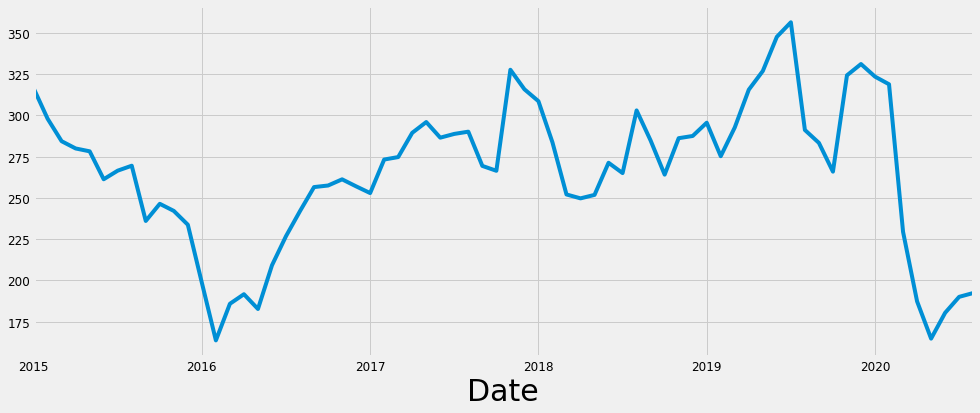

In [39]:
y.plot(figsize = (15, 6))
plt.show()

In [40]:
furniture.describe()

,Price,Open,High,Low
count,1385.000000,1385.000000,1385.000000,1385.000000
mean,266.274404,266.903213,270.343682,262.757906
std,45.555277,45.590664,45.829745,45.248334
min,150.850000,151.950000,153.200000,148.250000
25%,245.650000,245.900000,248.800000,242.550000
50%,270.800000,271.150000,274.600000,267.400000
75%,296.150000,296.500000,300.750000,292.200000
max,372.400000,371.950000,373.800000,366.200000


In [41]:
# Sort the Order Date 
furniture = furniture.sort_values('Date')

In [42]:
furniture.head()

,Date,Price,Open,High,Low,Vol.,Change %
1322,"Apr 01, 2015",273.45,266.65,274.65,263.15,12.38M,2.40%
1075,"Apr 01, 2016",195.65,193.70,197.25,192.00,21.75M,0.72%
333,"Apr 01, 2019",322.75,321.80,327.65,321.05,22.37M,0.62%
86,"Apr 01, 2020",186.55,194.00,194.50,185.25,52.95M,-5.23%
581,"Apr 02, 2018",246.15,251.80,252.00,244.90,14.99M,-1.50%


In [43]:
print(furniture.head(1))

              Date   Price    Open    High     Low    Vol. Change %
1322  Apr 01, 2015  273.45  266.65  274.65  263.15  12.38M    2.40%


In [44]:
#check any missing values
furniture.isnull().sum()

Date        0
Price       0
Open        0
High        0
Low         0
Vol.        0
Change %    0
dtype: int64

In [45]:
# grouping sales according to Order Date
furniture.groupby('Date')['Price'].sum().reset_index()

,Date,Price
0,"Apr 01, 2015",273.45
1,"Apr 01, 2016",195.65
2,"Apr 01, 2019",322.75
3,"Apr 01, 2020",186.55
4,"Apr 02, 2018",246.15
...,...,...
1380,"Sep 29, 2016",247.25
1381,"Sep 29, 2017",253.85
1382,"Sep 30, 2015",237.15
1383,"Sep 30, 2016",251.25


In [46]:
# min and max values of Order Date
print(furniture['Date'].min())
print(furniture['Date'].max())

Apr 01, 2015
Sep 30, 2019


In [47]:
furniture['Date'] = pd.to_datetime(furniture['Date'])

In [48]:
#set 'Order Date' as index
furniture = furniture.set_index('Date')
furniture.index

DatetimeIndex(['2015-04-01', '2016-04-01', '2019-04-01', '2020-04-01',
               '2018-04-02', '2019-04-02', '2017-04-03', '2018-04-03',
               '2019-04-03', '2020-04-03',
               ...
               '2015-09-28', '2016-09-28', '2017-09-28', '2018-09-28',
               '2015-09-29', '2016-09-29', '2017-09-29', '2015-09-30',
               '2016-09-30', '2019-09-30'],
              dtype='datetime64[ns]', name='Date', length=1385, freq=None)

In [49]:
y = furniture['Open'].resample('MS').mean()
y['2020':]

Date
2020-01-01    323.545652
2020-02-01    318.907500
2020-03-01    229.464286
2020-04-01    187.327778
2020-05-01    164.734211
2020-06-01    180.379545
2020-07-01    190.054348
2020-08-01    192.370000
Freq: MS, Name: Open, dtype: float64

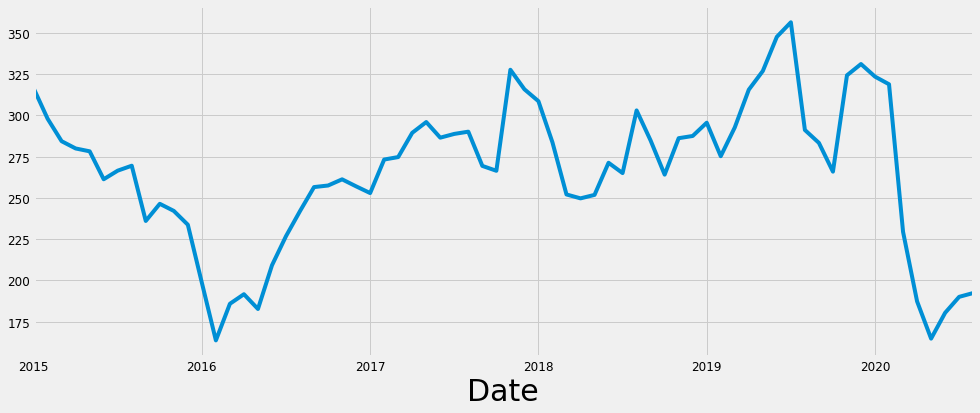

In [50]:
y.plot(figsize = (15, 6))
plt.show()

In [51]:
from pylab import rcParams
rcParams['figure.figsize'] = 18, 8

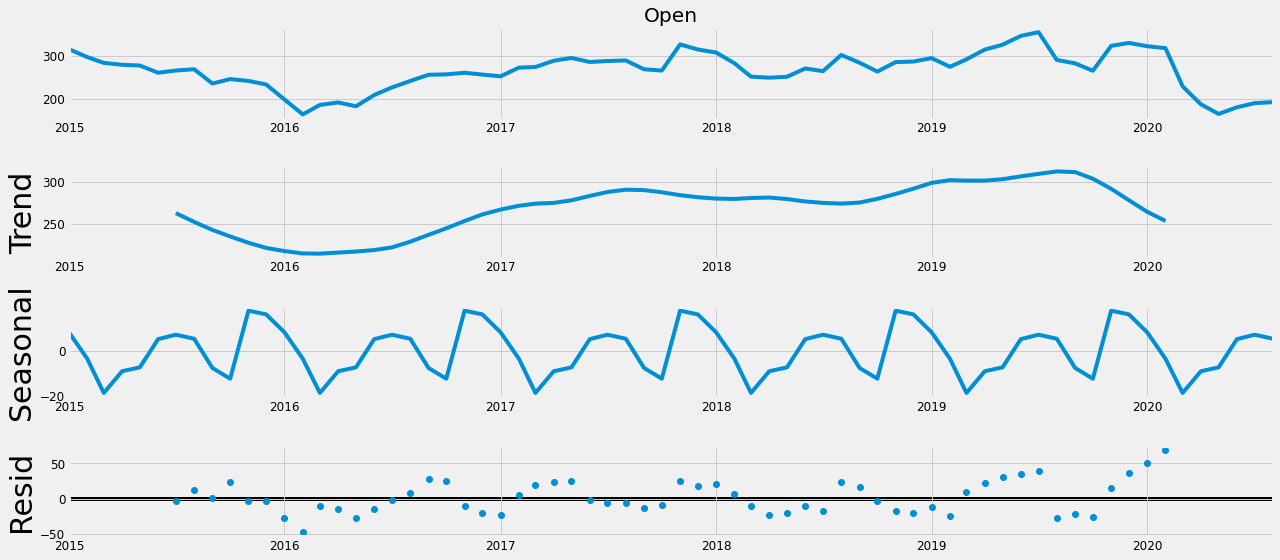

In [52]:
decomposition = sm.tsa.seasonal_decompose(y, model = 'additive')
fig = decomposition.plot()
plt.show()

In [53]:
# set the typical ranges for p, d, q
p = d = q = range(0, 2)

In [54]:
#take all possible combination for p, d and q
pdq = list(itertools.product(p, d, q))
seasonal_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, d, q))]


In [57]:
print('Examples of parameter combinations for Seasonal ARIMA...')
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[1]))
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[2]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[3]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[4]))


Examples of parameter combinations for Seasonal ARIMA...
SARIMAX: (0, 0, 1) x (0, 0, 1, 12)
SARIMAX: (0, 0, 1) x (0, 1, 0, 12)
SARIMAX: (0, 1, 0) x (0, 1, 1, 12)
SARIMAX: (0, 1, 0) x (1, 0, 0, 12)


In [58]:
# Using Grid Search find the optimal set of parameters that yields the best performance
for param in pdq:
    for param_seasonal in seasonal_pdq:
        try:
            mod = sm.tsa.statespace.SARIMAX(y, order = param, seasonal_order = param_seasonal, enforce_stationary = False,enforce_invertibility=False) 
            result = mod.fit()   
            print('ARIMA{}x{}12 - AIC:{}'.format(param, param_seasonal, result.aic))
        except:
            continue

ARIMA(0, 0, 0)x(0, 0, 0, 12)12 - AIC:956.1533587725011
ARIMA(0, 0, 0)x(0, 0, 1, 12)12 - AIC:907.6697325540109
ARIMA(0, 0, 0)x(0, 1, 0, 12)12 - AIC:639.0947366458386
ARIMA(0, 0, 0)x(0, 1, 1, 12)12 - AIC:615.6005954551745
ARIMA(0, 0, 0)x(1, 0, 0, 12)12 - AIC:807.9031960229587
ARIMA(0, 0, 0)x(1, 0, 1, 12)12 - AIC:786.0327879830983
ARIMA(0, 0, 0)x(1, 1, 0, 12)12 - AIC:613.0728234874648


C:\Users\muska\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:994: UserWarning: Non-stationary starting seasonal autoregressive Using zeros as starting parameters.
  warn('Non-stationary starting seasonal autoregressive'
C:\Users\muska\anaconda3\lib\site-packages\statsmodels\base\model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "


ARIMA(0, 0, 0)x(1, 1, 1, 12)12 - AIC:615.2479192944077
ARIMA(0, 0, 1)x(0, 0, 0, 12)12 - AIC:870.634672107099
ARIMA(0, 0, 1)x(0, 0, 1, 12)12 - AIC:825.0127314625657
ARIMA(0, 0, 1)x(0, 1, 0, 12)12 - AIC:590.4007228912246
ARIMA(0, 0, 1)x(0, 1, 1, 12)12 - AIC:570.1989112612285
ARIMA(0, 0, 1)x(1, 0, 0, 12)12 - AIC:742.7248798294183
ARIMA(0, 0, 1)x(1, 0, 1, 12)12 - AIC:725.4971427310246
ARIMA(0, 0, 1)x(1, 1, 0, 12)12 - AIC:569.1299796147111
ARIMA(0, 0, 1)x(1, 1, 1, 12)12 - AIC:569.9137276455003
ARIMA(0, 1, 0)x(0, 0, 0, 12)12 - AIC:615.8710398937232
ARIMA(0, 1, 0)x(0, 0, 1, 12)12 - AIC:617.4819085951111
ARIMA(0, 1, 0)x(0, 1, 0, 12)12 - AIC:545.3491631560577
ARIMA(0, 1, 0)x(0, 1, 1, 12)12 - AIC:524.3704458154585
ARIMA(0, 1, 0)x(1, 0, 0, 12)12 - AIC:617.2395674169425
ARIMA(0, 1, 0)x(1, 0, 1, 12)12 - AIC:617.7324468542141
ARIMA(0, 1, 0)x(1, 1, 0, 12)12 - AIC:519.7445286238183
ARIMA(0, 1, 0)x(1, 1, 1, 12)12 - AIC:520.1018421798443
ARIMA(0, 1, 1)x(0, 0, 0, 12)12 - AIC:616.4041077472242
ARIMA(0, 1,

C:\Users\muska\anaconda3\lib\site-packages\statsmodels\base\model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "


ARIMA(1, 0, 1)x(0, 0, 1, 12)12 - AIC:633.9566281314446
ARIMA(1, 0, 1)x(0, 1, 0, 12)12 - AIC:556.4283724448401
ARIMA(1, 0, 1)x(0, 1, 1, 12)12 - AIC:534.6936509688552
ARIMA(1, 0, 1)x(1, 0, 0, 12)12 - AIC:633.802226513379


C:\Users\muska\anaconda3\lib\site-packages\statsmodels\base\model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "


ARIMA(1, 0, 1)x(1, 0, 1, 12)12 - AIC:635.3619676255348
ARIMA(1, 0, 1)x(1, 1, 0, 12)12 - AIC:532.4772309029981
ARIMA(1, 0, 1)x(1, 1, 1, 12)12 - AIC:531.9147423413974
ARIMA(1, 1, 0)x(0, 0, 0, 12)12 - AIC:616.4024750259655
ARIMA(1, 1, 0)x(0, 0, 1, 12)12 - AIC:618.1563528106956
ARIMA(1, 1, 0)x(0, 1, 0, 12)12 - AIC:545.8639092081808
ARIMA(1, 1, 0)x(0, 1, 1, 12)12 - AIC:525.2770306910555
ARIMA(1, 1, 0)x(1, 0, 0, 12)12 - AIC:618.0165383797577
ARIMA(1, 1, 0)x(1, 0, 1, 12)12 - AIC:618.9180302536253
ARIMA(1, 1, 0)x(1, 1, 0, 12)12 - AIC:521.606492497225
ARIMA(1, 1, 0)x(1, 1, 1, 12)12 - AIC:521.7512001530328
ARIMA(1, 1, 1)x(0, 0, 0, 12)12 - AIC:618.3843445191735
ARIMA(1, 1, 1)x(0, 0, 1, 12)12 - AIC:620.1218568652814
ARIMA(1, 1, 1)x(0, 1, 0, 12)12 - AIC:547.7802506110435
ARIMA(1, 1, 1)x(0, 1, 1, 12)12 - AIC:526.8089759831716
ARIMA(1, 1, 1)x(1, 0, 0, 12)12 - AIC:619.9707441067667
ARIMA(1, 1, 1)x(1, 0, 1, 12)12 - AIC:620.8610328986138
ARIMA(1, 1, 1)x(1, 1, 0, 12)12 - AIC:523.5464779262146
ARIMA(1, 1,

In [59]:
#Fitting the ARIMA model using above optimal combination of p, d, q (optimal means combination at which we got lowest AIC score)

model = sm.tsa.statespace.SARIMAX(y, Open = (1, 1, 1),
                                  Vol = (1, 1, 0, 12)
                                 )
result = model.fit()
print(result.summary().tables[1])

                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.9960      0.009    107.013      0.000       0.978       1.014
sigma2       556.8234     65.787      8.464      0.000     427.883     685.763


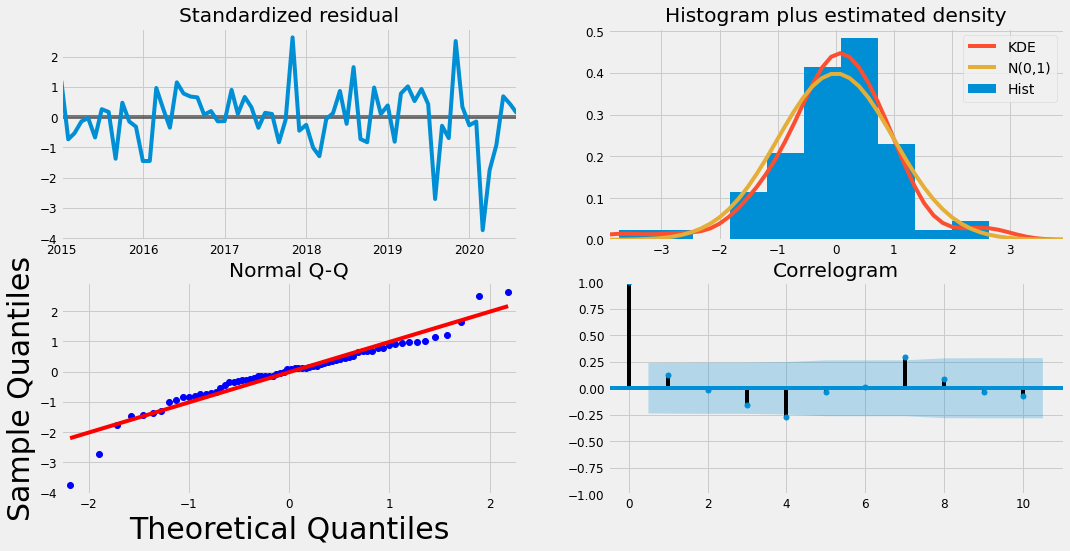

In [60]:
result.plot_diagnostics(figsize = (16, 8))
plt.show()

In [61]:
prediction = result.get_prediction(start = pd.to_datetime('2017-01-01'), dynamic = False)
prediction_ci = prediction.conf_int()
prediction_ci

,lower Open,upper Open
Date,,
2017-01-01,209.748801,302.247751
2017-02-01,205.695252,298.194203
2017-03-01,225.938462,318.437413
2017-04-01,227.427427,319.926377
2017-05-01,242.058760,334.557710
2017-06-01,248.569343,341.068294
2017-07-01,239.143545,331.642496
2017-08-01,241.408211,333.907162
2017-09-01,242.759897,335.258848


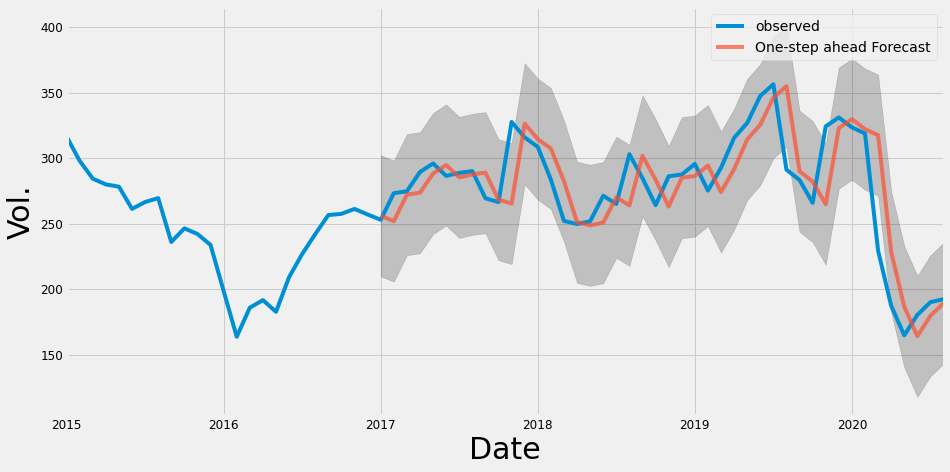

In [62]:
#Visualize the forecasting
ax = y['2014':].plot(label = 'observed')
prediction.predicted_mean.plot(ax = ax, label = 'One-step ahead Forecast', alpha = 0.7, figsize = (14, 7))
ax.fill_between(prediction_ci.index, prediction_ci.iloc[:, 0], prediction_ci.iloc[:, 1], color = 'k', alpha = 0.2)
ax.set_xlabel("Date")
ax.set_ylabel('Vol.')
plt.legend()
plt.show()